# My Spotify Credentials

In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects'

/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects


In [2]:
import creds

In [3]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.8/237.8 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [4]:
import numpy as np
import pandas as pd

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth,SpotifyClientCredentials

In [6]:
import string

print(string.ascii_letters+string.digits)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789


In [7]:
import random
import string

def randotrack():
    '''
    A function to generate a random track string for the Spotify database request.
    
    Inputs:
    None
    
    Returns:
    A random character from all available with a wildcard character (%) either
    at the beginning, the end, or both
    '''
    # all available characters
    chars = string.ascii_letters+string.digits

    # get random character
    randnum = np.random.randint(0,len(chars))
    randchar = chars[randnum]
    # wildcard at beginning, end, or both
    wildnum = np.random.randint(0,3)
    if wildnum == 0:
        return '%' + randchar
    if wildnum == 1:
        return randchar + '%'
    if wildnum == 2:
        return '%' + randchar + '%'

In [16]:
print(randotrack())

Q%


In [8]:
tracknum = 2000
limit = 40


sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id=creds.client_id,
    client_secret=creds.client_secret),
    requests_timeout=50000) # long timeout because the database is tempermental

In [9]:
def fetch_tracks(limit=40,tracknum=1000,genre='hip-hop',year='2019-2021',market='US'):
  '''
  Takes the number of songs, genre and year as inputs and return a dataframe holding all the information about the tracks as the output.

  Eg: limit=40
      tracknum=1000
      genre='hip-hop'
      year='2019-2021'
      market='US'
  '''
  # initialize dictionary holding info
  all_tracks_dict = {'id': [], 'popularity': [], 'track': [], 'artists': [], 'album_name': [],
                'album_type': [], 'release_date': [], 'image': [], 'duration_ms': [], 
                'preview_url': []}

  repeat_id_count = 0 # count of repeated songs

  while len(all_tracks_dict['id']) < tracknum:

    search = sp.search(q=f"genre:{genre} year:{year} track:{randotrack()}",
                        offset=np.random.randint(1001-limit), # random offset
                        limit=limit, market=market)

    # Iterate over all the tracks that were fetched using the search API
    for track in search['tracks']['items']:
      ## Don't repeat the song that is already stored in the dictionary
      if track['id'] in all_tracks_dict['id']:
        repeat_id_count += 1
        continue
      all_tracks_dict['id'].append(track['id'])
      all_tracks_dict['track'].append(track['name'])
      all_tracks_dict['artists'].append([a['name'] for a in track['artists']])
      all_tracks_dict['album_name'].append(track['album']['name'])
      all_tracks_dict['album_type'].append(track['album']['album_type'])
      all_tracks_dict['release_date'].append(track['album']['release_date'])
      all_tracks_dict['image'].append(track['album']['images'][0]['url'])
      all_tracks_dict['duration_ms'].append(track['duration_ms'])
      all_tracks_dict['preview_url'].append(track['preview_url'])
      all_tracks_dict['popularity'].append(track['popularity'])

  print(f"No of repeated songs avoided {repeat_id_count}\n")

  return pd.DataFrame(all_tracks_dict)

In [12]:
fetch_tracks(limit=1,tracknum=1,year='2020-2023',market='US')

No of repeated songs avoided 0



,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,1IY46WkIINigH71KTv7Uv2,54,All I Do,[Logic],YS Collection Vol. 1,album,2021-06-25,https://i.scdn.co/image/ab67616d0000b273496ddd...,231739,https://p.scdn.co/mp3-preview/a92bb93977e3a56d...


In [ ]:
# gather 500 data chunks with the above function, save to csv
for i in range(10):
        print(f'Data chunk #{i}...')
        fetch_tracks(limit=40,tracknum=100,year='2020-2023',market='US').to_csv(f'/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/track_df{i}.csv')

In [33]:
# concatenate all 500 dataframes into one large dataframe, ~6min
track_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/track_df0.csv', index_col=0)
for i in range(1,5):
    track_df = pd.concat([track_df, 
                          pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/track_df{i}.csv', index_col=0)])

In [34]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50065 entries, 0 to 10026
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50065 non-null  object
 1   popularity    50065 non-null  int64 
 2   track         50065 non-null  object
 3   artists       50065 non-null  object
 4   album_name    50065 non-null  object
 5   album_type    50065 non-null  object
 6   release_date  50065 non-null  object
 7   image         50065 non-null  object
 8   duration_ms   50065 non-null  int64 
 9   preview_url   50065 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.2+ MB


In [37]:
music_df = track_df.drop_duplicates()


In [38]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19380 entries, 0 to 10024
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            19380 non-null  object
 1   popularity    19380 non-null  int64 
 2   track         19380 non-null  object
 3   artists       19380 non-null  object
 4   album_name    19380 non-null  object
 5   album_type    19380 non-null  object
 6   release_date  19380 non-null  object
 7   image         19380 non-null  object
 8   duration_ms   19380 non-null  int64 
 9   preview_url   19380 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.6+ MB


In [39]:
music_df.isna().sum()

id              0
popularity      0
track           0
artists         0
album_name      0
album_type      0
release_date    0
image           0
duration_ms     0
preview_url     0
dtype: int64

In [41]:
# The dataframe has similar indexes after concating all the CSV files
music_df.sort_index()

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,5vHe9DKp6AQw6nv4fOqTIp,36,All The Things You're Searching For (feat. Kos...,"['G-Eazy', 'Kossisko', 'Ashley Benson']",Everything's Strange Here,album,2020-07-08,https://i.scdn.co/image/ab67616d0000b273e2f96f...,237772,https://p.scdn.co/mp3-preview/df4b8a55eb4ca778...
0,4u28ve9YnhRt7yV1sGupqg,0,8ball blue banshee gta3,['Rahiem Supreme'],Maximill gold goggle feel,album,2021-09-02,https://i.scdn.co/image/ab67616d0000b2733c44b6...,94000,https://p.scdn.co/mp3-preview/1fc0ab9bc7971300...
1,57ZbS3WKyzGO0LQEMGlcWP,1,1-800-Zen-Repair,['ECID'],Zen Repair,album,2021-09-24,https://i.scdn.co/image/ab67616d0000b27343c833...,181760,https://p.scdn.co/mp3-preview/473d7a3cc22f08b5...
1,356utrpfACzQkXJyE4MUmf,31,Lower Case (no cap) [feat. Killer Mike],"['Big Boi', 'Sleepy Brown', 'Killer Mike']",Lower Case (no cap) [feat. Killer Mike],single,2021-07-02,https://i.scdn.co/image/ab67616d0000b273ba789a...,187818,https://p.scdn.co/mp3-preview/8bd2d96abb2fd297...
2,5UJwRxxEUpod9rXreIcjpy,22,Zonamo Clipsessies #8 - Sepa,['Sepa'],Zonamo Clipsessies #8 - Sepa,single,2021-12-10,https://i.scdn.co/image/ab67616d0000b2735642bb...,158084,https://p.scdn.co/mp3-preview/a980610cca953ac0...
...,...,...,...,...,...,...,...,...,...,...
10021,4jQiLyv1wtOtgKVEiA7yuq,42,Tatted Up (feat. Fabo),"['K CAMP', 'FABO']",Kiss 5,album,2020-04-24,https://i.scdn.co/image/ab67616d0000b27389fb2a...,196143,https://p.scdn.co/mp3-preview/d5dfedf5691dbde8...
10022,5TgHN5M607nc3jyTzwYYzy,30,12th Floor,"['Declaime', 'Madlib', ""God's Gift""]",In The Beginning (Vol. 3),album,2023-01-13,https://i.scdn.co/image/ab67616d0000b273a12da4...,204434,https://p.scdn.co/mp3-preview/86806b98cfc28a5c...
10022,0f381U8m0oFfGKeIhEJk9J,43,Beam Me Up Scotty,['Nicki Minaj'],Beam Me Up Scotty,album,2021-05-14,https://i.scdn.co/image/ab67616d0000b2736d8b9f...,238733,https://p.scdn.co/mp3-preview/ddf02ff4871d153c...
10023,3rjgOKigd4t6o7nkhJDo91,28,Song 10,['Cities Aviv'],Working Title For The Album Secret Waters,album,2022-10-25,https://i.scdn.co/image/ab67616d0000b27378a52e...,175758,https://p.scdn.co/mp3-preview/d7b33748f8756808...


In [42]:
music_df.reset_index(inplace=True)

In [43]:
music_df.sort_index()

,index,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,0,5vHe9DKp6AQw6nv4fOqTIp,36,All The Things You're Searching For (feat. Kos...,"['G-Eazy', 'Kossisko', 'Ashley Benson']",Everything's Strange Here,album,2020-07-08,https://i.scdn.co/image/ab67616d0000b273e2f96f...,237772,https://p.scdn.co/mp3-preview/df4b8a55eb4ca778...
1,1,356utrpfACzQkXJyE4MUmf,31,Lower Case (no cap) [feat. Killer Mike],"['Big Boi', 'Sleepy Brown', 'Killer Mike']",Lower Case (no cap) [feat. Killer Mike],single,2021-07-02,https://i.scdn.co/image/ab67616d0000b273ba789a...,187818,https://p.scdn.co/mp3-preview/8bd2d96abb2fd297...
2,2,3L90LHk1hAmHtBeZtHq8Lv,32,4 Da Kidz,['Kid Cudi'],Man On The Moon III: The Chosen,album,2020-12-11,https://i.scdn.co/image/ab67616d0000b2734fd23a...,184240,https://p.scdn.co/mp3-preview/53e71be48dd3fed0...
3,3,2kWuVqpxPnj131Z53vxF98,54,KUPALA,"['alyona alyona', 'Jerry Heil', 'ela.']",KUPALA,single,2022-07-06,https://i.scdn.co/image/ab67616d0000b273c67443...,168320,https://p.scdn.co/mp3-preview/d235c50692005fda...
4,4,2aeLXgFyLaMHU3blVpyqY3,39,Koala,"['Koorosh', 'Scott Storch', 'Sohrab Mj', 'Sepe...",420 Vol. 2,album,2022-08-25,https://i.scdn.co/image/ab67616d0000b273ec1d91...,216241,https://p.scdn.co/mp3-preview/d3f56051dcf584a2...
...,...,...,...,...,...,...,...,...,...,...,...
19375,9966,5Y5nvARDUlWuEGecSnSSV5,24,1985,"['Freddie Gibbs', 'The Alchemist']",1985,single,2020-05-28,https://i.scdn.co/image/ab67616d0000b273b13ebc...,152546,https://p.scdn.co/mp3-preview/6c36800600080685...
19376,9967,3ynRk3Il0qDYEOi2dtKiqb,53,ELLE PLEURE EN HIVER,['Moji x Sboy'],ELLE PLEURE EN HIVER,single,2022-01-31,https://i.scdn.co/image/ab67616d0000b27357cf0c...,169110,https://p.scdn.co/mp3-preview/e5a4ebc8c9ebdabe...
19377,10022,5TgHN5M607nc3jyTzwYYzy,30,12th Floor,"['Declaime', 'Madlib', ""God's Gift""]",In The Beginning (Vol. 3),album,2023-01-13,https://i.scdn.co/image/ab67616d0000b273a12da4...,204434,https://p.scdn.co/mp3-preview/86806b98cfc28a5c...
19378,10023,3rjgOKigd4t6o7nkhJDo91,28,Song 10,['Cities Aviv'],Working Title For The Album Secret Waters,album,2022-10-25,https://i.scdn.co/image/ab67616d0000b27378a52e...,175758,https://p.scdn.co/mp3-preview/d7b33748f8756808...


In [44]:
music_df.drop(columns='index',inplace=True)

In [45]:
music_df['artists']

0                  ['G-Eazy', 'Kossisko', 'Ashley Benson']
1               ['Big Boi', 'Sleepy Brown', 'Killer Mike']
2                                             ['Kid Cudi']
3                  ['alyona alyona', 'Jerry Heil', 'ela.']
4        ['Koorosh', 'Scott Storch', 'Sohrab Mj', 'Sepe...
                               ...                        
19375                   ['Freddie Gibbs', 'The Alchemist']
19376                                      ['Moji x Sboy']
19377                 ['Declaime', 'Madlib', "God's Gift"]
19378                                      ['Cities Aviv']
19379                                     ['Cano de Cali']
Name: artists, Length: 19380, dtype: object

In [47]:
type(music_df['artists'].iloc[0])

str

In [50]:
#The values present in the artist column are present as string, hence they need to converte to their actual datatype i.e List
import ast
music_df['artists'] = music_df['artists'].map(lambda x: ast.literal_eval(x))

In [51]:
type(music_df['artists'].iloc[0])

list

In [54]:
music_df_explode = music_df.explode('artists')

In [55]:
music_df_explode[music_df_explode['artists'] == 'Drake']

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
13,7eqBsRv7eldDdDEA9MMl5C,32,IMY2 (with Kid Cudi),Drake,Certified Lover Boy,album,2021-09-02,https://i.scdn.co/image/ab67616d0000b2737529f7...,252378,https://p.scdn.co/mp3-preview/73a7d810b42b656b...
331,4GLWeHYEynOJA6bGJuw2N9,56,Pussy & Millions (feat. Travis Scott),Drake,Her Loss,album,2022-11-03,https://i.scdn.co/image/ab67616d0000b2730f76fb...,242026,https://p.scdn.co/mp3-preview/c1bc3f9b4e57430f...
344,6ZoZ4KGIDD23DohdVk0Ybw,53,Wants and Needs (feat. Lil Baby),Drake,Scary Hours 2,single,2021-03-05,https://i.scdn.co/image/ab67616d0000b273aeb93e...,194089,https://p.scdn.co/mp3-preview/0b18b8a9e79c54fc...
347,7g7ZSLwsRWWnkuQ2s3Iq8X,52,WAIT FOR U (feat. Drake & Tems),Drake,I NEVER LIKED YOU,album,2022-04-27,https://i.scdn.co/image/ab67616d0000b2732ae6b8...,189893,https://p.scdn.co/mp3-preview/be63cb9c11e12fba...
499,5LYsEBLHY4PwmK1MRic1mr,57,Jimmy Cooks (feat. 21 Savage),Drake,"Honestly, Nevermind",album,2022-06-16,https://i.scdn.co/image/ab67616d0000b27322dfcf...,218364,https://p.scdn.co/mp3-preview/0eb7b32b46056b1a...
...,...,...,...,...,...,...,...,...,...,...
18555,4Flfb4fGscN9kXPOduQLrv,74,Treacherous Twins,Drake,Her Loss,album,2022-11-04,https://i.scdn.co/image/ab67616d0000b27302854a...,180098,https://p.scdn.co/mp3-preview/dcb8040eb747fd49...
19142,1L3sTUdIBSNn0vjVgM6ZRp,44,Calling My Name,Drake,"Honestly, Nevermind",album,2022-06-16,https://i.scdn.co/image/ab67616d0000b27322dfcf...,129964,https://p.scdn.co/mp3-preview/fd24a4d9536a1a42...
19333,3raLbm16SvJwGtnmGSh3oR,0,Churchill Downs,Drake,Water - Hip Hop Today,compilation,2023-01-27,https://i.scdn.co/image/ab67616d0000b273bc7e87...,309327,https://p.scdn.co/mp3-preview/0d2d3982f3d42216...
19334,1Y6e4RHtUsu9JN1CwpVMQr,0,Churchill Downs,Drake,New Day Rap,compilation,2023-01-27,https://i.scdn.co/image/ab67616d0000b273de3c03...,309327,https://p.scdn.co/mp3-preview/19e789a4a90e0f7a...


In [59]:
len(music_df_explode[music_df_explode['artists'] == 'Kanye West'])

18

## Check the target value distributin i.e. popularity

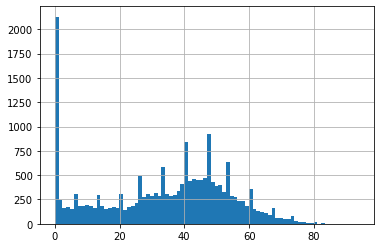

In [62]:
music_df['popularity'].hist(bins=80)

In [68]:
# Verifying if there is any track that does not have the preview. 
music_df['preview_url'].isna().sum()

0

In [73]:
# Checking how many tracks have the same URL Link - same music
music_df[music_df['preview_url'].duplicated()]

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
245,2bIlVGHTnSHDHdVZ1wfj2s,0,Panda,[Desiigner],Hip Hop Addict,compilation,2023-01-27,https://i.scdn.co/image/ab67616d0000b27328a51c...,246761,https://p.scdn.co/mp3-preview/6573bec420ce9371...
246,01tLjc0p9TEfTO2Kq6xVy8,0,Panda,[Desiigner],Rap Kings,compilation,2023-01-26,https://i.scdn.co/image/ab67616d0000b273188b78...,246761,https://p.scdn.co/mp3-preview/6573bec420ce9371...
247,5PSFHvWFHTO42vPb5rxyO7,0,Panda,[Desiigner],Super Game Day 2023 - Halftime Show - Tailgate...,compilation,2023-01-27,https://i.scdn.co/image/ab67616d0000b2730f9fc2...,246761,https://p.scdn.co/mp3-preview/6573bec420ce9371...
417,5PrUgp50eMSlL8oCF1tkQX,56,Stay Down (with 6LACK & Young Thug),"[Lil Durk, 6LACK, Young Thug]",Stay Down (with 6LACK & Young Thug),single,2020-10-30,https://i.scdn.co/image/ab67616d0000b273b71746...,169330,https://p.scdn.co/mp3-preview/85aaebf678ce90bb...
482,6QCWPC6OFUxuoaMtRe573z,57,"Fuck My Cousin, Pt. II (feat. Lil Durk)","[Lil Zay Osama, Lil Durk]","Fuck My Cousin, Pt. II (feat. Lil Durk)",single,2022-07-29,https://i.scdn.co/image/ab67616d0000b273d14479...,194560,https://p.scdn.co/mp3-preview/cd422277e6face1c...
...,...,...,...,...,...,...,...,...,...,...
19327,5jWurKiQpHczQdK37zDXjZ,8,Ridin' 5,"[Paul Wall, Lil’ Keke]",Ridin’ 5,single,2020-03-13,https://i.scdn.co/image/ab67616d0000b273d27d2a...,192261,https://p.scdn.co/mp3-preview/794b4bec921b5ddd...
19344,2MHDDFhXk9Y7cp1XDx4BJn,24,Freshman 10 (Freestyle) - 10th Anniversary,[Big Sean],Freshman 10,single,2021-07-02,https://i.scdn.co/image/ab67616d0000b27327c03e...,232568,https://p.scdn.co/mp3-preview/4888132bed075b84...
19345,1DTb02CxHzgch47DHv2olU,24,10 Feet,"[IDK, T-Pain]",USEE4YOURSELF (Deluxe),album,2021-10-29,https://i.scdn.co/image/ab67616d0000b273be42c2...,178118,https://p.scdn.co/mp3-preview/86cb458f8e01cbc6...
19352,7iFfcWLF4Mp9wk3MHw8Z8L,24,1995,[IDK],USEE4YOURSELF,album,2021-07-09,https://i.scdn.co/image/ab67616d0000b27362a89e...,248027,https://p.scdn.co/mp3-preview/aa3ebc3307f5b0a6...


In [75]:
music_df['preview_url'].duplicated().sum()

1775

In [78]:
music_df.drop_duplicates(subset=['preview_url'],inplace=True)

In [79]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17605 entries, 0 to 19379
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            17605 non-null  object
 1   popularity    17605 non-null  int64 
 2   track         17605 non-null  object
 3   artists       17605 non-null  object
 4   album_name    17605 non-null  object
 5   album_type    17605 non-null  object
 6   release_date  17605 non-null  object
 7   image         17605 non-null  object
 8   duration_ms   17605 non-null  int64 
 9   preview_url   17605 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.5+ MB


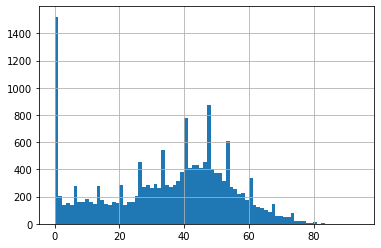

In [80]:
music_df['popularity'].hist(bins=80)

In [85]:
music_df_explode.groupby('artists').mean().sort_values('popularity',ascending=False)['popularity'].head(50)

artists
ROSALÍA              86.000000
Julieta Venegas      83.000000
Salastkbron          80.000000
Ikky                 80.000000
Villano Antillano    79.000000
Alan Gomez           79.000000
EL NOBA              79.000000
Evlay                79.000000
FIFA Sound           78.000000
The Temper Trap      78.000000
Devika Badyal        78.000000
Myriam Fares         78.000000
SUGA                 77.000000
Silambarasan TR      77.000000
Christian Nodal      77.000000
Quevedo              77.000000
Thaman S             77.000000
TeeDee               77.000000
Shubh                76.400000
Rô Rosa              76.000000
Vilen                75.000000
Sunny Malton         74.500000
SOE                  74.000000
Empire of the Sun    74.000000
Sampha               74.000000
Sanjoy               74.000000
DJ Gimi-O            74.000000
Jaani                74.000000
Avvy Sra             74.000000
Gambi                73.000000
Phonk                73.000000
Alonzo               73.000000


In [94]:
music_df_explode[music_df_explode['artists'] == 'ROSALÍA']['preview_url'].iloc[0]

'https://p.scdn.co/mp3-preview/ceef8698eae288f63a34a2473a7b8c2d5a8a06ea?cid=fd6fb1bbe7894e689fe191f6c77f244c'

In [98]:
np.percentile(music_df['popularity'],80)

51.0

### When we see the hist plot for the popularity and from the the percentile function it is clear that we can safely consider popularity=50 as our threshold i.e if the popularity is > 50, we can tell that the song would be from the top 20's 

In [ ]:
# After manually inspecting few rows, it was seen that there are a few rows that had different url for the music previews
# but the song name and the duration of the song were the same, hence it could be told that these songs are duplicates. 

In [106]:
len(track_df[track_df.duplicated(subset=['track','duration_ms'])])

2854

In [111]:
track_df[track_df.duplicated(subset=['track','duration_ms','popularity'])]['track'].value_counts()

En Cero                                  66
1-800-273-8255                           62
24/7                                     27
Let's Talk About Sex                     24
8 Missed Calls                           20
                                         ..
Big Daddy Wiz                             1
St. Thomas Native (feat. Chronic Law)     1
Gata Salvaje                              1
Good Vibes                                1
Afro Trap Part. 11 (King Kong)            1
Name: track, Length: 287, dtype: int64

In [112]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19380 entries, 0 to 10024
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            19380 non-null  object
 1   popularity    19380 non-null  int64 
 2   track         19380 non-null  object
 3   artists       19380 non-null  object
 4   album_name    19380 non-null  object
 5   album_type    19380 non-null  object
 6   release_date  19380 non-null  object
 7   image         19380 non-null  object
 8   duration_ms   19380 non-null  int64 
 9   preview_url   19380 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.1+ MB


In [114]:
track_df.drop_duplicates(subset=['track','duration_ms','popularity'], inplace=True)

In [115]:
## Save the final dataset till now 
track_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/cleaned_data.csv')

In [13]:
## Check Point 1

track_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/cleaned_data.csv', index_col=0)

In [14]:
track_df.head()

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,5vHe9DKp6AQw6nv4fOqTIp,36,All The Things You're Searching For (feat. Kos...,"['G-Eazy', 'Kossisko', 'Ashley Benson']",Everything's Strange Here,album,2020-07-08,https://i.scdn.co/image/ab67616d0000b273e2f96f...,237772,https://p.scdn.co/mp3-preview/df4b8a55eb4ca778...
1,356utrpfACzQkXJyE4MUmf,31,Lower Case (no cap) [feat. Killer Mike],"['Big Boi', 'Sleepy Brown', 'Killer Mike']",Lower Case (no cap) [feat. Killer Mike],single,2021-07-02,https://i.scdn.co/image/ab67616d0000b273ba789a...,187818,https://p.scdn.co/mp3-preview/8bd2d96abb2fd297...
2,3L90LHk1hAmHtBeZtHq8Lv,32,4 Da Kidz,['Kid Cudi'],Man On The Moon III: The Chosen,album,2020-12-11,https://i.scdn.co/image/ab67616d0000b2734fd23a...,184240,https://p.scdn.co/mp3-preview/53e71be48dd3fed0...
3,2kWuVqpxPnj131Z53vxF98,54,KUPALA,"['alyona alyona', 'Jerry Heil', 'ela.']",KUPALA,single,2022-07-06,https://i.scdn.co/image/ab67616d0000b273c67443...,168320,https://p.scdn.co/mp3-preview/d235c50692005fda...
4,2aeLXgFyLaMHU3blVpyqY3,39,Koala,"['Koorosh', 'Scott Storch', 'Sohrab Mj', 'Sepe...",420 Vol. 2,album,2022-08-25,https://i.scdn.co/image/ab67616d0000b273ec1d91...,216241,https://p.scdn.co/mp3-preview/d3f56051dcf584a2...


In [117]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18612 entries, 0 to 10024
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18612 non-null  object
 1   popularity    18612 non-null  int64 
 2   track         18612 non-null  object
 3   artists       18612 non-null  object
 4   album_name    18612 non-null  object
 5   album_type    18612 non-null  object
 6   release_date  18612 non-null  object
 7   image         18612 non-null  object
 8   duration_ms   18612 non-null  int64 
 9   preview_url   18612 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.6+ MB


In [14]:
from sklearn.model_selection import train_test_split

# Splitting the datasets

X = track_df.drop(columns=['popularity'])
y = track_df['popularity']

X_pretr, X_holdout, y_pretr, y_holdout = train_test_split(X, y, test_size=0.10, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_pretr, y_pretr,test_size=0.20, random_state=101)


In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13400, 9), (3350, 9), (13400,), (3350,))

Text(0, 0.5, 'No of tracks')

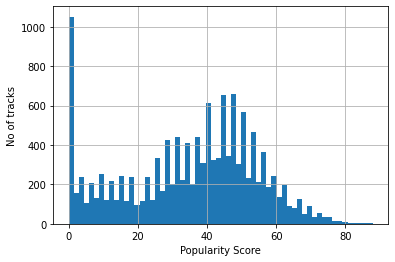

In [17]:
import matplotlib.pyplot as plt

y_train.hist(bins=60)
plt.xlabel('Popularity Score')
plt.ylabel('No of tracks')

In [18]:
# We will consider any song that has popularity score > 40, to be a hit song

y_train = y_train.map(lambda x: 1 if x >40 else 0)

In [19]:
y_train.value_counts(normalize=True)

0    0.537463
1    0.462537
Name: popularity, dtype: float64

In [20]:
y_test = y_test.map(lambda x: 1 if x >40 else 0)

In [21]:
y_test.value_counts(normalize=True)

0    0.544776
1    0.455224
Name: popularity, dtype: float64

In [133]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects


In [22]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import os 
import requests
from pydub import AudioSegment
from tqdm import tqdm

# Storing the current working directory in a variable
current_dir = !pwd
tqdm.pandas()


def create_directories(label):
  # Making all the three variables global, so that they can be accessed outside the function
  global full_dir,mp3_dir,wav_dir

  full_dir = f'{current_dir[0]}/data/{label}'
  mp3_dir = f'{full_dir}/mp3'
  wav_dir = f'{full_dir}/wav'

  if not os.path.exists(full_dir):
    os.mkdir(full_dir)

  if not os.path.exists(mp3_dir):
    os.mkdir(mp3_dir)

  if not os.path.exists(wav_dir):
    os.mkdir(wav_dir)

def download_mp3_music(url,directory,music_name):
  try:
    r = requests.get(url, timeout=2)
    with open(f'{directory}/{music_name}.mp3', 'wb') as f:
        f.write(r.content)
    print(f'mp3 downloaded: {music_name}.mp3')
  except:
    print(f'mp3 timeout: index {music_name}')

def fetch_mp3(data):
  data.progress_apply(lambda x: (download_mp3_music(x['preview_url'],mp3_dir,x['track'])), axis=1)

def fetch_wav(data):
  for file in tqdm(os.listdir(mp3_dir)):
    if file.startswith('.'):
      continue
    source = f'{mp3_dir}/{file}'
    destination = f'{wav_dir}/{file.split(".")[0]}.wav'

    AudioSegment.from_mp3(source).export(destination, format='wav')
    audio_file_name = file.split(".mp3")[0]
    data.loc[data['track'] == audio_file_name,'file_location'] = destination

  return data


# for file in os.listdir(mp3_dir):
#   print(file.split(".mp3")[0])



In [185]:
track_df.head(2).apply(lambda x: (x['preview_url'],x['track']), axis=1)

0    (https://p.scdn.co/mp3-preview/df4b8a55eb4ca77...
1    (https://p.scdn.co/mp3-preview/8bd2d96abb2fd29...
dtype: object

In [235]:
X_train.shape

(13400, 9)

In [229]:
pd.options.mode.chained_assignment = None

In [26]:
create_directories(label='train')
fetch_mp3(data=X_train)

In [27]:
fetch_wav(data=X_train)

100%|██████████| 11455/11455 [1:46:01<00:00,  1.80it/s]


,id,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url,file_location
2643,1DA6UYm3jqf8b3ecWUbo6i,Skinny Suge,"['Freddie Gibbs', 'The Alchemist']",Alfredo,album,2020-05-29,https://i.scdn.co/image/ab67616d0000b27352c240...,172426,https://p.scdn.co/mp3-preview/0b0e4f7225c18977...,/content/drive/MyDrive/Colab Notebooks/Portfol...
4059,6SFkLxjZLpK6PNwO91sMES,I'm God,"['Clams Casino', 'Imogen Heap']",I'm God,single,2020-04-24,https://i.scdn.co/image/ab67616d0000b273febe78...,277710,https://p.scdn.co/mp3-preview/30e8475b6118a782...,/content/drive/MyDrive/Colab Notebooks/Portfol...
7480,0ZXDVUrfkLfEqYRmljrV35,"Catch The Sun - From ""Queen & Slim: The Soundt...",['Lil Baby'],My Turn,album,2020-02-28,https://i.scdn.co/image/ab67616d0000b27357eae8...,182329,https://p.scdn.co/mp3-preview/f79d75fbc855ed54...,/content/drive/MyDrive/Colab Notebooks/Portfol...
6697,4VFw9yMd9hBuiGvtRojiNV,91er,"['Anize', '91erz']",91er,single,2020-10-10,https://i.scdn.co/image/ab67616d0000b273b3de7a...,220615,https://p.scdn.co/mp3-preview/93f19e70eb03d685...,/content/drive/MyDrive/Colab Notebooks/Portfol...
8143,1nNTOytumanwfSx7KLQAFW,777,['LosPetitFellas'],777: República Independiente del F*cking Goce,album,2021-11-05,https://i.scdn.co/image/ab67616d0000b2739a7673...,260146,https://p.scdn.co/mp3-preview/7f00a5a2a3580a8c...,/content/drive/MyDrive/Colab Notebooks/Portfol...
...,...,...,...,...,...,...,...,...,...,...
4350,5jiJXFYMQpBfPr4N1Z46oI,Virgil Discount,"['T.R.U.', '2 Chainz', 'Skooly']",Virgil Discount,single,2020-01-07,https://i.scdn.co/image/ab67616d0000b2731d154c...,138066,https://p.scdn.co/mp3-preview/4555efda038308d4...,/content/drive/MyDrive/Colab Notebooks/Portfol...
4027,5PyDFYiYh4ftZkVZB3LSX8,Freestyle 5min #12,['Zkr'],Caméléon,album,2022-03-04,https://i.scdn.co/image/ab67616d0000b273610f2d...,403615,https://p.scdn.co/mp3-preview/462ee81ef3fbe5ad...,/content/drive/MyDrive/Colab Notebooks/Portfol...
9367,3y9xlSIGdX06DwG0a9IYue,Off The Chain,['Rio Da Yung Og'],Accidental Shit Talkin,album,2020-11-13,https://i.scdn.co/image/ab67616d0000b273ccf2c0...,118886,https://p.scdn.co/mp3-preview/3bb8bfc79d4cda35...,/content/drive/MyDrive/Colab Notebooks/Portfol...
5558,6ZobnIPufkCYnBBDPztIZv,Michael & Quincy,['Nas'],King's Disease III,album,2022-11-11,https://i.scdn.co/image/ab67616d0000b273007e5f...,167724,https://p.scdn.co/mp3-preview/ae78d43a5b8f6094...,/content/drive/MyDrive/Colab Notebooks/Portfol...


In [33]:
create_directories(label='test')

In [ ]:
fetch_mp3(data=X_test)

In [35]:
fetch_wav(data=X_test)

100%|██████████| 3168/3168 [00:03<00:00, 852.09it/s] 


,id,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url,file_location
2693,5aXdE6AyjGce9lDyYmMQyj,Un Día Todo Se Termina (Remix),"['Tornillo', 'Santa Fe Klan']",Cactus,album,2022-10-28,https://i.scdn.co/image/ab67616d0000b273212345...,251803,https://p.scdn.co/mp3-preview/5515d571a798191b...,NaN
8793,4K3uvMYzUlmexnL5BkqRTN,My Gang,['Young Nudy'],EA Monster,album,2022-08-08,https://i.scdn.co/image/ab67616d0000b273ac6342...,136880,https://p.scdn.co/mp3-preview/89d8e52541a3ba26...,/content/drive/MyDrive/Colab Notebooks/Portfol...
5859,2JhrukutQJ9oVUVP6myknn,Te Iré a Buscar - Deluxe Version,"['Santa Fe Klan', 'Nanpa Básico']",Mundo,album,2022-08-11,https://i.scdn.co/image/ab67616d0000b2733221ec...,222111,https://p.scdn.co/mp3-preview/3aeba28152106b2f...,NaN
4268,2KEZIZyGqQPWGwy3Smg4ax,Zet Je Goed,"['Bizzey', 'Sjaak']",Zet Je Goed,single,2022-08-04,https://i.scdn.co/image/ab67616d0000b2735b9734...,173538,https://p.scdn.co/mp3-preview/a9c92a1256600f52...,/content/drive/MyDrive/Colab Notebooks/Portfol...
3687,0AbDjrdgKTXzGzvQ1drgQl,Un Altro Show (feat. Geolier),"['Shiva', 'Geolier']",Milano Demons,album,2022-11-25,https://i.scdn.co/image/ab67616d0000b273c7e356...,171702,https://p.scdn.co/mp3-preview/36aa4ef859e1b519...,/content/drive/MyDrive/Colab Notebooks/Portfol...
...,...,...,...,...,...,...,...,...,...,...
7006,2i40wZkiPAGIFudrGH99nx,Outside,['Kota the Friend'],Outside,single,2021-04-21,https://i.scdn.co/image/ab67616d0000b2738daa01...,203793,https://p.scdn.co/mp3-preview/6bb1697758d61e76...,/content/drive/MyDrive/Colab Notebooks/Portfol...
1351,2Eo9vIyyl8A5K0riODY4Tr,"Survie - x1,3",['Moubarak'],"Survie (x1,3)",single,2022-11-18,https://i.scdn.co/image/ab67616d0000b273aba41c...,132789,https://p.scdn.co/mp3-preview/04ae51e9b9d73d32...,/content/drive/MyDrive/Colab Notebooks/Portfol...
2877,5d4T6L8Td6bL6iWKhNxe7g,Das U,['Planet Giza'],Das U,single,2022-10-05,https://i.scdn.co/image/ab67616d0000b273562dd0...,135445,https://p.scdn.co/mp3-preview/a4b99768986563ec...,/content/drive/MyDrive/Colab Notebooks/Portfol...
8190,1ojKYgNmscIpQMyWyqkVuG,Zone (feat. Ace Hood),"['Shepherd', 'Ace Hood']",Zone (feat. Ace Hood),single,2021-11-05,https://i.scdn.co/image/ab67616d0000b2737b09b0...,176281,https://p.scdn.co/mp3-preview/0a9447f0f3d3d007...,/content/drive/MyDrive/Colab Notebooks/Portfol...


In [25]:
## Save the final dataset till now 
X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/X_train.csv')
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/X_test.csv')
y_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/y_train.csv')
y_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/y_test.csv')

In [35]:
## Check Point 2

X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/X_train.csv', index_col=0)
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/X_test.csv', index_col=0)
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/y_train.csv', index_col=0)
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/Dataset/y_test.csv', index_col=0)

In [11]:
!pip install librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13400, 10), (13400, 1), (3350, 10), (3350, 1))

In [28]:
X_train.head()

,id,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url,file_location
2643,1DA6UYm3jqf8b3ecWUbo6i,Skinny Suge,"['Freddie Gibbs', 'The Alchemist']",Alfredo,album,2020-05-29,https://i.scdn.co/image/ab67616d0000b27352c240...,172426,https://p.scdn.co/mp3-preview/0b0e4f7225c18977...,/content/drive/MyDrive/Colab Notebooks/Portfol...
4059,6SFkLxjZLpK6PNwO91sMES,I'm God,"['Clams Casino', 'Imogen Heap']",I'm God,single,2020-04-24,https://i.scdn.co/image/ab67616d0000b273febe78...,277710,https://p.scdn.co/mp3-preview/30e8475b6118a782...,/content/drive/MyDrive/Colab Notebooks/Portfol...
7480,0ZXDVUrfkLfEqYRmljrV35,"Catch The Sun - From ""Queen & Slim: The Soundt...",['Lil Baby'],My Turn,album,2020-02-28,https://i.scdn.co/image/ab67616d0000b27357eae8...,182329,https://p.scdn.co/mp3-preview/f79d75fbc855ed54...,/content/drive/MyDrive/Colab Notebooks/Portfol...
6697,4VFw9yMd9hBuiGvtRojiNV,91er,"['Anize', '91erz']",91er,single,2020-10-10,https://i.scdn.co/image/ab67616d0000b273b3de7a...,220615,https://p.scdn.co/mp3-preview/93f19e70eb03d685...,/content/drive/MyDrive/Colab Notebooks/Portfol...
8143,1nNTOytumanwfSx7KLQAFW,777,['LosPetitFellas'],777: República Independiente del F*cking Goce,album,2021-11-05,https://i.scdn.co/image/ab67616d0000b2739a7673...,260146,https://p.scdn.co/mp3-preview/7f00a5a2a3580a8c...,/content/drive/MyDrive/Colab Notebooks/Portfol...


In [37]:
X_train.isna().sum()

id                 0
track              0
artists            0
album_name         0
album_type         0
release_date       0
image              0
duration_ms        0
preview_url        0
file_location    832
dtype: int64

In [46]:
y_train = y_train.loc[X_train['file_location'].notna()]
y_test = y_test.loc[X_test['file_location'].notna()]

In [ ]:
X_train[X_train['file_location'].isnull()].index.tolist()

In [47]:
X_train.dropna(subset=['file_location'],inplace=True)
X_test.dropna(subset=['file_location'],inplace=True)

In [49]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((12568, 10), (12568, 1), (3157, 10), (3157, 1))

In [51]:
X_train.isna().sum()

id               0
track            0
artists          0
album_name       0
album_type       0
release_date     0
image            0
duration_ms      0
preview_url      0
file_location    0
dtype: int64

In [70]:
X_train['file_location'].isna().sum()

0

In [71]:
X_test['file_location'].isna().sum()

193

In [72]:
X_test.dropna(subset=['file_location'],inplace=True)

In [115]:
import librosa

def get_train_mel_spec(X_train_paths):

    specs_pre_ = []
    spaxmax2_ = 0 # initialize max size in dimension 2 for X_train

    for count, song in enumerate(X_train_paths, start=1):
      print(song)
      y, sr = librosa.load(song, duration=30)
      
      spec = librosa.power_to_db(librosa.feature.melspectrogram(y=y,sr=sr), ref=np.min)
      print(spec.shape)
      specs_pre_.append(spec[np.newaxis, ..., np.newaxis])
      if spec.shape[1] > spaxmax2_:
                spaxmax2_ = spec.shape[1]
      print(spec.shape[1])
      
      print(f"wavs run: {count}/{len(X_train_paths)}")
  
    resized = []
    for spec in specs_pre_:
      resized.append(np.resize(spec, (1, 128, spaxmax2_, 1)))
      mel_specs_ = np.concatenate(resized, axis=0)
      break
    return mel_specs_

In [118]:
mel_spec_datadict = {}

mel_spec_datadict['X_train'] = (get_train_mel_spec(X_train_paths=X_train['file_location']), y_train)

/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/data/train/wav/Skinny Suge.wav
(128, 1292)
1292
wavs run: 1/12568
/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/data/train/wav/I'm God.wav
(128, 1292)
1292
wavs run: 2/12568
/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/data/train/wav/Catch The Sun - From "Queen & Slim: The Soundtrack".wav
(128, 1292)
1292
wavs run: 3/12568
/content/drive/MyDrive/Colab Notebooks/Portfolio - Projects/data/train/wav/91er.wav


KeyboardInterrupt: ignored

In [119]:
X_train.index

Int64Index([2643, 4059, 7480, 6697, 8143,  164,  574,  321,  525, 3376,
            ...
            5781,   58, 9315, 7138, 8626, 4350, 4027, 9367, 5558,  296],
           dtype='int64', length=12568)

In [131]:
y_train.index

Int64Index([2643, 2643, 4059, 7480, 7480, 6697, 6697, 8143, 8143, 8143,
            ...
            4350, 4027, 4027, 9367, 9367, 9367, 5558, 5558,  296,  296],
           dtype='int64', length=23425)

In [123]:
y_train = y_train[y_train.index.isin(X_train.index)]